In [ ]:
from google.colab import drive
ROOT = "/content/drive"  
drive.mount(ROOT)  
%cd "/content/drive/MyDrive/PFE_PIMM/"
%ls

Mounted at /content/drive
/content/drive/MyDrive/PFE_PIMM
'Copie de labeling.ipynb'   meltpool_bitmap/     visualisation.ipynb
 ct_scan/                   registration.ipynb
 labeling.ipynb             tomo_labels/


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

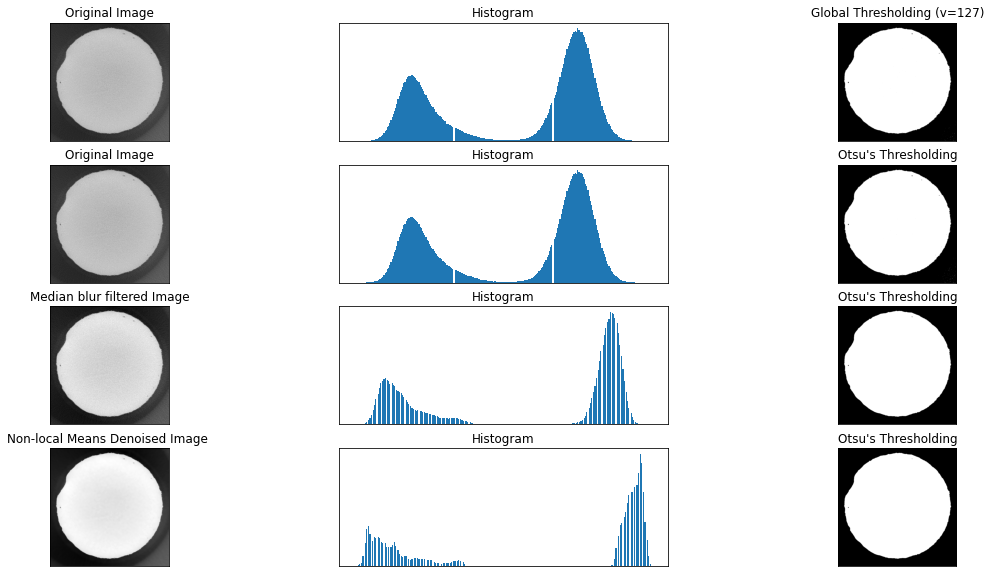

In [ ]:
img = cv2.imread('ct_scan/slice_tomo_part3.png',0)
#img = cv2.medianBlur(img,5)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.medianBlur(img,5)
denoise1 = cv2.fastNlMeansDenoising(blur, h=15, templateWindowSize=7, searchWindowSize=21) 
ret3,th3 = cv2.threshold(denoise1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after non-local means denoising
denoise = cv2.fastNlMeansDenoising(img, h=30, templateWindowSize=7, searchWindowSize=21) 
ret4,th4 = cv2.threshold(denoise,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
plt.rcParams["figure.figsize"] = [20,10]

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3,
          denoise, 0, th4]
titles = ['Original Image','Histogram','Global Thresholding (v=127)',
          'Original Image','Histogram',"Otsu's Thresholding",
          'Median blur filtered Image','Histogram',"Otsu's Thresholding",
          'Non-local Means Denoised Image ','Histogram',"Otsu's Thresholding"]

for i in range(4):
    plt.subplot(4,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(4,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

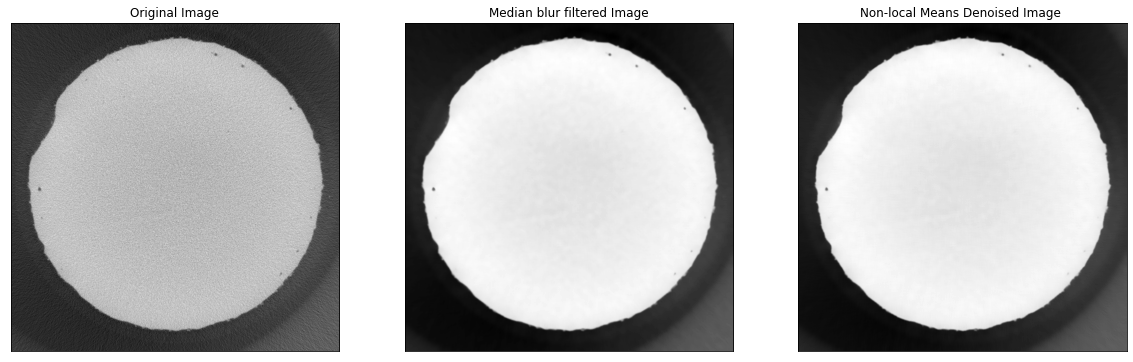

In [ ]:

images = [img,
          denoise1,
          denoise]
titles = ['Original Image',
          'Median blur filtered Image',
          'Non-local Means Denoised Image ']
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

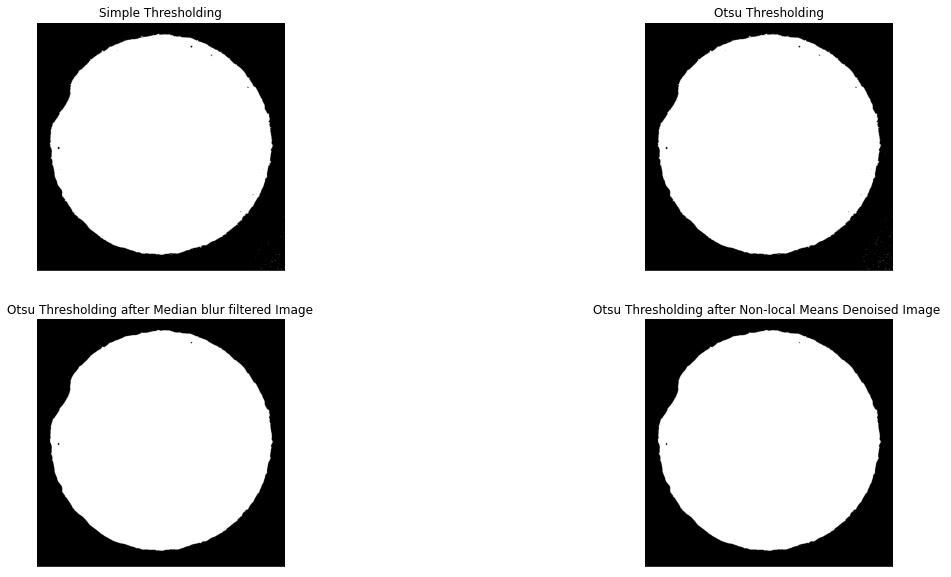

In [ ]:
images = [th1,
          th2,
          th3,
          th4]

titles = ['Simple Thresholding',
          'Otsu Thresholding',
          'Otsu Thresholding after Median blur filtered Image',
          'Otsu Thresholding after Non-local Means Denoised Image ']
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()